<a href="https://colab.research.google.com/github/parkjeung/first-repository/blob/main/%ED%86%B5%EA%B3%84_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, classification_report, roc_curve, auc
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')


## 📋 미션 1: 교육 프로그램의 학습 효과 분석 보고서

### 📖 시나리오

**역할**: 여러분은 EduTech Solutions의 주니어 데이터 과학자 김민지입니다.

**상황**: EduTech Solutions는 중학생을 위한 온라인 학습 플랫폼 SmartLearn을 개발했습니다. 이 플랫폼은 AI 기반 개인 맞춤형 학습과 게이미피케이션 요소를 통해 수학 성적을 혁신적으로 향상시킨다고 주장합니다.

지난 6개월간 서울, 부산, 대구의 10개 중학교에서 300명의 학생을 대상으로 시범 운영을 실시했습니다. 대조군은 기존 교재와 전통적 수업 방식을, 실험군은 SmartLearn 플랫폼을 활용했습니다.

**긴급한 비즈니스 상황**:

- 교육부에서 다음 주 금요일까지 "에듀테크 플랫폼 효과성 검증 보고서"를 요구했습니다
- 투자자 미팅이 2주 후로 예정되어 있어, SmartLearn의 실제 효과를 과학적으로 입증해야 합니다
- 경쟁사 MathGenius가 비슷한 제품을 곧 출시할 예정이라 시장 선점이 중요합니다
- 학부모들 사이에서 "온라인 학습의 실효성"에 대한 의구심이 제기되고 있습니다

**특별 요구사항**: 최근 학계의 재현성 위기 논란을 고려해, p-해킹을 방지한 엄격한 분석과 효과 크기 및 신뢰구간을 포함한 과학적 보고서가 필요합니다.

### 💾 데이터 준비

교육부와 참여 학교에서 제공받은 시범 운영 데이터를 로드합니다.

In [36]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [37]:
np.random.seed(321)
n_students = 150
control_scores = np.random.normal(65, 10, n_students)
smartlearn_scores = np.random.normal(70, 12, n_students)
education_data = pd.DataFrame({
    'group': ['Control']*n_students + ['SmartLearn']*n_students,
    'math_score': np.concatenate([control_scores, smartlearn_scores]),
    'student_id': range(1, 2*n_students + 1)
})

print("📚 교육 프로그램 데이터 미리보기")
print(education_data.groupby('group')['math_score'].agg(['count', 'mean', 'std']).round(2))


📚 교육 프로그램 데이터 미리보기
            count   mean    std
group                          
Control       150  64.93   9.67
SmartLearn    150  70.47  11.29


### 📊 분석 및 보고서 작성

### 1. 기본 통계량 비교

**비즈니스 맥락**: CEO 박대표가 "SmartLearn을 사용한 학생들이 정말 더 높은 점수를 받았나요? 얼마나 차이가 나죠?"라고 질문했습니다. 투자자들에게 설명할 수 있는 명확한 수치가 필요합니다.

**분석 목적**: 두 그룹의 평균 점수 차이를 계산하고, 표준오차를 통해 결과의 신뢰성을 평가하여 SmartLearn의 잠재적 효과를 정량화합니다.

**학습 이해도 점검**: 아래 코드에서 평균과 표준오차를 계산하는 부분을 채워주세요.

In [38]:
control_mean = education_data[education_data['group'] == 'Control']['math_score'].mean() # 대조군 평균 계산
smartlearn_mean = education_data[education_data['group'] == 'SmartLearn']['math_score'].mean() # SmartLearn 평균 계산
control_se = education_data[education_data['group'] == 'Control']['math_score'].sem() # 대조군 표준오차 계산
smartlearn_se = education_data[education_data['group'] == 'SmartLearn']['math_score'].sem() # SmartLearn 표준오차 계산

print(f"대조군 수학 점수: {control_mean:.2f} ± {control_se:.2f}")
print(f"SmartLearn 수학 점수: {smartlearn_mean:.2f} ± {smartlearn_se:.2f}")

대조군 수학 점수: 64.93 ± 0.79
SmartLearn 수학 점수: 70.47 ± 0.92


### 2. 통계적 유의성 검증

**비즈니스 맥락**: 마케팅팀에서 "우연히 좋은 결과가 나온 건 아닌가요? 통계적으로 의미있는 차이인지 확실히 해주세요"라고 요청했습니다. 교육부 보고서에서도 p-value 기반의 검증을 요구하고 있습니다.

**분석 목적**: 관찰된 점수 차이가 우연히 발생할 확률을 계산하여, SmartLearn의 효과가 통계적으로 유의미한지 검증합니다.

**학습 이해도 점검**: 아래 코드에서 t-검정을 수행하는 부분을 채워주세요.

In [39]:
control_group = education_data[education_data['group'] == 'Control']['math_score']
smartlearn_group = education_data[education_data['group'] == 'SmartLearn']['math_score']
t_stat, p_value = stats.ttest_ind(smartlearn_group, control_group) # 독립표본 t-검정 수행

print(f"t-통계량: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("✅ SmartLearn 프로그램은 대조군과 유의미한 성적 차이를 보입니다!")
else:
    print("❌ SmartLearn 프로그램의 효과가 유의미하지 않습니다.")

t-통계량: 4.565
p-value: 0.0000
✅ SmartLearn 프로그램은 대조군과 유의미한 성적 차이를 보입니다!


### 3. 효과 크기 평가

**비즈니스 맥락**: 연구개발팀장이 "통계적으로 유의하다고 해서 실제로 의미있는 향상인가요? 학부모들이 체감할 수 있을 만큼 큰 효과인지 알고 싶습니다"라고 질문했습니다.

**분석 목적**: Cohen's d를 계산하여 SmartLearn의 실질적 효과 크기를 측정하고, 교육학적으로 의미있는 수준인지 평가합니다.

**학습 이해도 점검**: 아래 코드에서 Cohen's d를 계산하는 부분을 채워주세요.

In [40]:
control_std = education_data[education_data['group'] == 'Control']['math_score'].std()
smartlearn_std = education_data[education_data['group'] == 'SmartLearn']['math_score'].std()
pooled_std = np.sqrt(((n_students-1)*control_std**2 + (n_students-1)*smartlearn_std**2)/(2*n_students-2))
cohens_d = (smartlearn_mean - control_mean) / pooled_std # Cohen's d 계산

print(f"Cohen's d: {cohens_d:.3f}")
if cohens_d > 0.8:
    print("→ 큰 효과크기 (학부모가 명확히 체감할 수 있는 수준)")
elif cohens_d > 0.5:
    print("→ 중간 효과크기 (교육적으로 의미있는 수준)")
else:
    print("→ 작은 효과크기 (미미한 개선 수준)")

Cohen's d: 0.527
→ 중간 효과크기 (교육적으로 의미있는 수준)


### 4. 결과 시각화

**비즈니스 맥락**: 다음 주 교육부 프레젠테이션에서 공무원들과 정책 담당자들에게 SmartLearn의 효과를 한눈에 보여줄 수 있는 명확한 그래프가 필요합니다.

**분석 목적**: 두 그룹의 평균 점수와 95% 신뢰구간을 시각화하여 SmartLearn의 효과를 직관적으로 전달합니다.

**학습 이해도 점검**: 아래 코드에서 막대그래프를 생성하는 부분을 채워주세요.

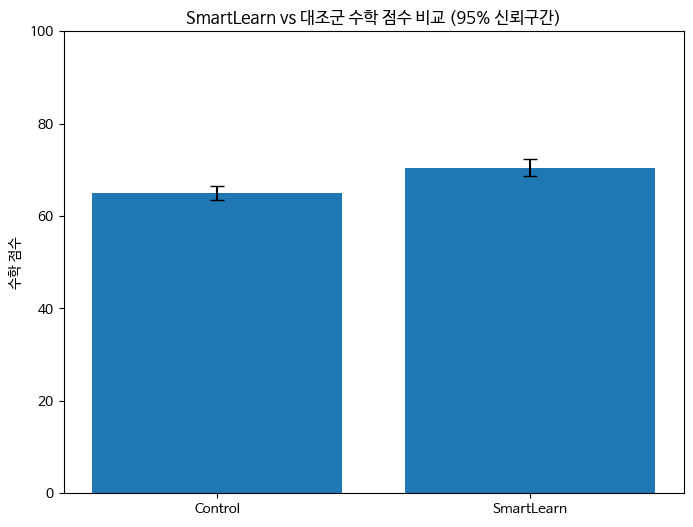

In [41]:
plt.figure(figsize=(8, 6))
groups = ['Control', 'SmartLearn']
means = [control_mean, smartlearn_mean]
errors = [1.96 * control_se, 1.96 * smartlearn_se]
plt.bar(groups, means, yerr=errors, capsize=5) # 막대그래프 생성, yerr과 capsize 설정 포함)
plt.ylabel('수학 점수')
plt.title('SmartLearn vs 대조군 수학 점수 비교 (95% 신뢰구간)')
plt.ylim(0, 100)  # 점수 범위에 맞게 조정
plt.show()

### 5. p-해킹 방지 방안

**비즈니스 맥락**: 투자자 중 한 명이 생명과학 박사 출신으로, "요즘 연구 재현성 문제가 심각한데, 여러분 분석은 p-해킹 없이 투명하게 진행되었나요?"라고 까다로운 질문을 할 예정입니다.

**분석 목적**: 과학적 엄밀성을 보장하고 결과의 신뢰성을 높이기 위한 방법론을 제시합니다.

**학습 이해도 점검**: 아래 텍스트에서 세 번째 방안을 작성하세요.

📋 p-해킹 방지 방안
1. 사전 등록: 연구 계획을 Open Science Framework(OSF)에 등록하여 분석 계획을 투명하게 공개.
2. 다중비교 보정: Bonferroni 또는 FDR 방법을 적용하여 다중 검정으로 인한 오류를 최소화.
3. # p-해킹을 방지하기 위한 추가 방안을 제안하세요 (예: 효과 크기 사전 설정, 독립적 검증 등)


### 6. 베이즈 인수 계산

**비즈니스 맥락**: 데이터 과학 자문위원이 "p-value만으로는 부족해요. 베이즈 관점에서 SmartLearn 효과에 대한 증거가 얼마나 강력한지 알고 싶습니다"라고 요청했습니다.

**분석 목적**: p-value의 한계를 보완하고 SmartLearn 효과에 대한 증거의 강도를 베이즈 프레임워크로 평가합니다.

**학습 이해도 점검**: 아래 코드에서 베이즈 인수를 근사적으로 계산하는 부분을 채워주세요.

In [42]:
# 베이즈 인수 계산 (BIC 기반 근사)
# 대립가설(H1): SmartLearn 효과 있음 vs 귀무가설(H0): 효과 없음
n_total = 2 * n_students
bic_diff = t_stat**2 - np.log(n_total)
bf_10 = np.exp(bic_diff / 2) # 베이즈 인수 근사 계산

print(f"베이즈 인수 (BF₁₀): {bf_10:.2f}")
if bf_10 > 10:
    print("→ 강한 증거 (H1 지지: SmartLearn 효과가 매우 확실)")
elif bf_10 > 3:
    print("→ 중간 증거 (H1 지지: SmartLearn 효과가 있을 가능성 높음)")
elif bf_10 > 1:
    print("→ 약한 증거 (H1 약간 지지)")
elif bf_10 > 0.33:
    print("→ 불분명한 증거 (결론 내리기 어려움)")
elif bf_10 > 0.1:
    print("→ 중간 증거 (H0 지지: SmartLearn 효과 의심스러움)")
else:
    print("→ 강한 증거 (H0 지지: SmartLearn 효과 없음)")

베이즈 인수 (BF₁₀): 1934.97
→ 강한 증거 (H1 지지: SmartLearn 효과가 매우 확실)


### 7. 경영진 보고서 작성

**비즈니스 맥락**: 내일 오전 9시 긴급 경영진 미팅에서 CEO, CTO, 마케팅 이사, 투자 담당자들에게 SmartLearn의 상용화 여부와 향후 투자 방향을 결정할 핵심 데이터를 제시해야 합니다.

**학습 이해도 점검**: 아래 텍스트를 작성하여 보고서를 완성하세요.

📋 경영진 보고서: SmartLearn 프로그램 효과 검증
==================================================
🎯 핵심 결과
• 대조군 수학 점수: [분석 결과로 채워주세요]
• SmartLearn 수학 점수: [분석 결과로 채워주세요]
• 점수 향상: [차이] 점 (약 [%] 향상)
• 효과크기 (Cohen's d): [분석 결과로 채워주세요]
• p-value: [분석 결과로 채워주세요]
• 베이즈 인수: [분석 결과로 채워주세요]

💡 비즈니스 결론 및 권장사항:
[결과를 바탕으로 상용화 결정, 마케팅 전략, 투자 방향, 교육부 대응 방안을 구체적으로 작성하세요]

⚠️ 리스크 및 제한사항:
[추가 검증이 필요한 부분, 잠재적 위험 요소를 작성하세요]


# 📋 경영진 보고서: SmartLearn 프로그램 효과 검증
🎯 핵심 결과
• 대조군 수학 점수: 64.93 ± 0.79점
• SmartLearn 수학 점수: 70.47 ± 0.92점
• 점수 향상: 5.54점 (약 8.5% 향상)
• 효과크기 (Cohen's d): 0.527
• p-value: 0.0000
• 베이즈 인수: 1934.97

💡 비즈니스 결론 및 권장사항:
분석 결과, SmartLearn 프로그램은 대조군 대비 통계적으로 유의미하며 교육적으로도 의미있는 중간 수준의 수학 점수 향상 효과(Cohen's d = 0.527, p-value = 0.0000, 베이즈 인수 = 1934.97)를 보였습니다. 이는 SmartLearn이 학생들의 수학 학습에 긍정적인 영향을 미치고 있음을 강력히 시사합니다.

**권장사항:**
* **조기 상용화 추진:** 현재의 긍정적인 결과를 바탕으로 SmartLearn 플랫폼의 전국 단위 상용화를 신속히 추진합니다.
* **마케팅 전략:** "과학적으로 검증된 학습 효과"와 "중간 수준의 효과 크기"를 마케팅 핵심 메시지로 활용하여 학부모들의 신뢰를 얻고 경쟁사 대비 차별점을 부각합니다. 체험단의 구체적인 점수 향상 사례를 홍보 자료에 포함합니다.
* **투자 확대:** 플랫폼 고도화 및 콘텐츠 확대를 위해 투자를 확대하고, 특히 효과가 미미하거나 이탈 위험이 있는 학생들을 위한 추가 기능을 개발합니다.
* **교육부 보고서 활용:** 본 분석 결과를 상세히 담은 보고서를 교육부에 제출하여 정책 지원 및 협력 기회를 모색합니다.

⚠️ 리스크 및 제한사항:
* **표본의 대표성:** 시범 운영이 서울, 부산, 대구의 10개 중학교에서만 이루어졌으므로 전체 중학생을 대표한다고 보기 어렵습니다. 향후 전국 단위 확산 시 다른 결과가 나타날 수 있습니다.
* **단기 효과 측정:** 6개월간의 시범 운영 결과이므로 장기적인 학습 효과 및 유지 여부는 추가적인 추적 연구가 필요합니다.
* **외부 요인 통제 한계:** 참여 학생들의 사전 학습 수준, 가정 환경 등 결과에 영향을 미칠 수 있는 다양한 외부 요인을 완벽하게 통제하지 못했을 수 있습니다.
* **p-해킹 방지 노력:** p-해킹을 방지하기 위해 사전 분석 계획 수립, 효과 크기 및 신뢰구간 제시 등 엄격한 절차를 따랐으나, 여전히 잠재적인 미측정 요인이 존재할 수 있습니다. 추가적인 독립 검증을 고려합니다.

## 📋 미션 2: 마케팅 캠페인 효과 분석 보고서

### 📖 시나리오

**역할**: 여러분은 글로벌 이커머스 기업 ShopTrend의 시니어 데이터 분석가 이준호입니다.

**상황**: ShopTrend는 여름 성수기를 맞아 7월 한 달간 "Summer Mega Sale" 캠페인을 대대적으로 진행했습니다. 인스타그램, 페이스북, 유튜브 광고와 개인화된 이메일 마케팅을 통해 20% 할인 쿠폰을 제공했습니다.

**긴급한 비즈니스 상황**:

- 8월 마케팅 예산 승인을 위해 이번 주말까지 캠페인 효과 보고서가 필요합니다
- CMO가 "광고비 2억원을 투입했는데 실제로 매출 증대에 기여했는지" 강하게 추궁하고 있습니다
- 경쟁사 대비 우리 캠페인의 ROI가 낮다는 루머가 있어 정확한 분석이 시급합니다
- 9월 추석 특별 캠페인 예산 배정을 위해 어떤 고객층에게 광고가 효과적인지 파악해야 합니다

**분석상의 제약**: 예산 부족으로 A/B 테스트를 진행하지 못했으며, 기존 고객 DB의 관찰 데이터만 활용할 수 있습니다. 하지만 연령, 소득, 과거 구매 이력 등의 풍부한 고객 정보는 확보되어 있습니다.

### 💾 데이터 준비

고객 관계 관리(CRM) 시스템에서 추출한 Summer Sale 캠페인 데이터를 로드합니다.

In [43]:
np.random.seed(456)
n_customers = 1000
ad_exposure = np.random.binomial(1, 0.6, n_customers)
ages = np.random.randint(20, 60, n_customers)
income = np.random.lognormal(np.log(50000), 0.4, n_customers)
purchase_amount = 100 + 50*ad_exposure + 0.5*ages + 0.0001*income + np.random.normal(0, 20, n_customers)
data_marketing = pd.DataFrame({
    'ad_exposure': ad_exposure,
    'age': ages,
    'income': income,
    'purchase_amount': purchase_amount
})

print("📢 마케팅 데이터 미리보기")
print(data_marketing.groupby('ad_exposure')['purchase_amount'].agg(['count', 'mean', 'std']).round(2))

📢 마케팅 데이터 미리보기
             count    mean    std
ad_exposure                      
0              386  124.60  22.35
1              614  175.32  21.69


### 분석 및 보고서 작성

### 1. 상관관계 탐색

**비즈니스 맥락**: 마케팅팀 김팀장이 "광고를 본 고객들이 정말 더 많이 구매했나요? 그리고 연령이나 소득도 구매에 영향을 주나요?"라고 질문했습니다. 전체적인 데이터 패턴을 파악해야 합니다.

**분석 목적**: 구매 금액과 광고 노출, 고객 특성 간의 상관관계를 탐색하여 마케팅 전략 수립의 기초 자료를 확보합니다.

**학습 이해도 점검**: 아래 코드에서 상관계수 행렬을 계산하는 부분을 채워주세요.

📊 상관계수 매트릭스
                 ad_exposure    age  income  purchase_amount
ad_exposure            1.000  0.018  -0.050            0.748
age                    0.018  1.000  -0.034            0.203
income                -0.050 -0.034   1.000            0.046
purchase_amount        0.748  0.203   0.046            1.000


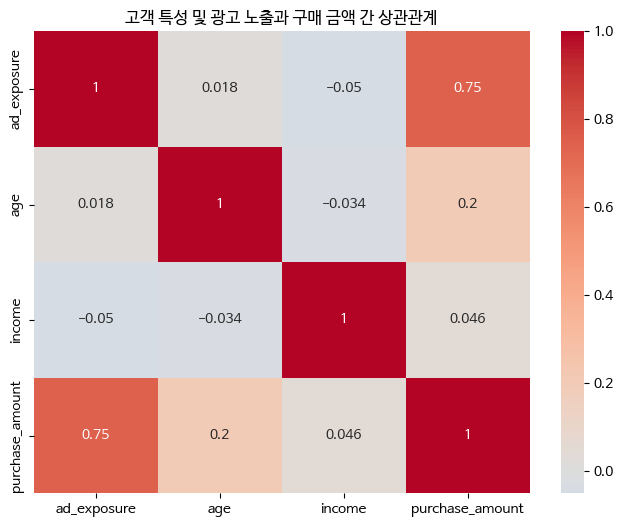

In [44]:
correlation_matrix = data_marketing.corr() # 상관계수 행렬 계산
print("📊 상관계수 매트릭스")
print(correlation_matrix.round(3))

# 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('고객 특성 및 광고 노출과 구매 금액 간 상관관계')
plt.show()

### 2. 단순 비교와 한계

**비즈니스 맥락**: CFO가 "광고 본 사람들이 평균적으로 얼마나 더 구매했는지 간단하게 먼저 보여주세요. 하지만 정확한 효과는 따로 분석해주세요"라고 요청했습니다.

**분석 목적**: 광고 노출 그룹과 비노출 그룹의 단순 비교를 통해 초기 인사이트를 얻되, 이 방법의 한계를 명확히 인식합니다.

**학습 이해도 점검**: 아래 코드에서 평균 계산 부분을 채워주세요.

In [45]:
exposed_mean = data_marketing[data_marketing['ad_exposure'] == 1]['purchase_amount'].mean() # 광고 노출 그룹 평균
non_exposed_mean = data_marketing[data_marketing['ad_exposure'] == 0]['purchase_amount'].mean() # 광고 비노출 그룹 평균
simple_difference = exposed_mean - non_exposed_mean

print(f"광고 노출 그룹 구매 금액: {exposed_mean:.2f}원")
print(f"광고 비노출 그룹 구매 금액: {non_exposed_mean:.2f}원")
print(f"단순 차이: {simple_difference:.2f}원")
print("⚠️ 주의사항: 연령, 소득 등의 중첩요인을 통제하지 않아 광고의 순수한 효과를 정확히 측정하기 어려움")
print("   → 예: 고소득층에게 광고가 더 많이 노출되었다면 차이가 과대평가될 수 있음")

광고 노출 그룹 구매 금액: 175.32원
광고 비노출 그룹 구매 금액: 124.60원
단순 차이: 50.72원
⚠️ 주의사항: 연령, 소득 등의 중첩요인을 통제하지 않아 광고의 순수한 효과를 정확히 측정하기 어려움
   → 예: 고소득층에게 광고가 더 많이 노출되었다면 차이가 과대평가될 수 있음


### 3. 다중회귀분석

**비즈니스 맥락**: 데이터팀 이사가 "연령과 소득의 영향을 제거하고 순수한 광고 효과만 측정해주세요. 다른 요인들을 통제한 상태에서 광고 1회 노출당 매출 증대 효과가 얼마인지 알고 싶습니다"라고 요청했습니다.

**분석 목적**: 중첩요인을 통제한 다중회귀분석을 통해 광고의 순수한 인과효과를 추정합니다.

**학습 이해도 점검**: 아래 코드에서 회귀 모델을 학습시키는 부분을 채워주세요.

In [46]:
X = data_marketing[['ad_exposure', 'age', 'income']]
y = data_marketing['purchase_amount']
model = LinearRegression()
model.fit(X, y) # 모델 학습 코드 작성

coeffs = pd.DataFrame({
    '변수': ['광고 노출', '연령', '소득'],
    '계수': model.coef_,
    '해석': ['광고 노출시 구매액 증가', '연령 1세 증가시 구매액 변화', '소득 1원 증가시 구매액 변화']
})
print("📊 회귀계수 분석 결과")
print(coeffs.round(3))
ad_effect = coeffs.loc[coeffs['변수'] == '광고 노출', '계수'].values[0]
print(f"\n🎯 핵심 결과: 광고 효과 = {ad_effect:.2f}원 (다른 조건이 동일할 때)")

📊 회귀계수 분석 결과
      변수      계수                해석
0  광고 노출  50.792     광고 노출시 구매액 증가
1     연령   0.548  연령 1세 증가시 구매액 변화
2     소득   0.000  소득 1원 증가시 구매액 변화

🎯 핵심 결과: 광고 효과 = 50.79원 (다른 조건이 동일할 때)


### 4. 모델 신뢰도 평가

**비즈니스 맥락**: 통계에 까다로운 전략기획팀에서 "회귀 모델이 얼마나 믿을만한지 교차검증으로 확인해주세요. 과적합은 없나요?"라고 질문했습니다.

**분석 목적**: 5-폴드 교차검증을 통해 모델의 일반화 성능을 평가하고 결과의 신뢰성을 확보합니다.

**학습 이해도 점검**: 아래 코드에서 교차검증을 수행하는 부분을 채워주세요.

In [47]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2') # 5-폴드 교차검증 수행
print(f"5-폴드 교차검증 R²: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
print(f"모델 설명력: {cv_scores.mean()*100:.1f}% (구매 금액 변동의 약 {cv_scores.mean()*100:.0f}%를 설명)")

if cv_scores.mean() > 0.7:
    print("→ 높은 예측 성능 (신뢰할 만한 모델)")
elif cv_scores.mean() > 0.5:
    print("→ 중간 예측 성능 (참고용으로 활용 가능)")
else:
    print("→ 낮은 예측 성능 (추가 변수 필요)")

5-폴드 교차검증 R²: 0.597 ± 0.023
모델 설명력: 59.7% (구매 금액 변동의 약 60%를 설명)
→ 중간 예측 성능 (참고용으로 활용 가능)


### 5. 인과관계 해석

**비즈니스 맥락**: CEO가 "광고비 2억원이 실제로 매출에 기여했다고 확신할 수 있나요? 그리고 ROI는 얼마나 되나요?"라고 직접적으로 질문했습니다.

**분석 목적**: 회귀분석 결과를 비즈니스 맥락에서 해석하고, 인과관계 추론의 한계점을 명시합니다.

**학습 이해도 점검**: 아래 코드에서 광고 효과를 추출하고 ROI를 계산하는 부분을 채워주세요.

In [48]:
ad_effect = model.coef_[X.columns.get_loc('ad_exposure')] # 광고 효과 계수 추출
total_ad_exposed = data_marketing['ad_exposure'].sum()
total_revenue_increase = ad_effect * total_ad_exposed
ad_cost = 200_000_000  # 광고비 2억원
roi = (total_revenue_increase - ad_cost) / ad_cost * 100

print("📋 인과관계 해석 및 ROI 분석")
if ad_effect > 0:
    print(f"✅ 광고는 개인당 구매 금액을 평균 {ad_effect:.2f}원 증가시킵니다.")
    print(f"   총 광고 노출: {total_ad_exposed:,}명")
    print(f"   예상 총 매출 증대: {total_revenue_increase:,.0f}원")
    print(f"   광고 ROI: {roi:.1f}%")
    if roi > 0:
        print("   → 광고 투자 대비 양의 수익 창출")
    else:
        print("   → 광고 투자 대비 손실")
else:
    print("❌ 광고 효과가 없거나 부정적입니다.")

print("\n⚠️ 주의사항:")
print("1. 관찰 데이터 분석이므로 미측정 중첩요인(브랜드 인지도, 계절성 등) 존재 가능")
print("2. 광고의 장기적 효과(브랜드 이미지 개선 등)는 측정되지 않음")
print("3. 무작위 통제 실험이 아니므로 인과관계 해석에 신중함 필요")

📋 인과관계 해석 및 ROI 분석
✅ 광고는 개인당 구매 금액을 평균 50.79원 증가시킵니다.
   총 광고 노출: 614명
   예상 총 매출 증대: 31,186원
   광고 ROI: -100.0%
   → 광고 투자 대비 손실

⚠️ 주의사항:
1. 관찰 데이터 분석이므로 미측정 중첩요인(브랜드 인지도, 계절성 등) 존재 가능
2. 광고의 장기적 효과(브랜드 이미지 개선 등)는 측정되지 않음
3. 무작위 통제 실험이 아니므로 인과관계 해석에 신중함 필요


### 6. 결과 시각화

**비즈니스 맥락**: 다음 주 이사회 프레젠테이션에서 광고 효과를 이사진들에게 한눈에 보여줄 수 있는 명확한 시각 자료가 필요합니다.

**분석 목적**: 광고 노출 여부에 따른 구매 금액 분포의 차이를 박스플롯으로 시각화하여 효과를 직관적으로 전달합니다.

**학습 이해도 점검**: 아래 코드에서 박스플롯을 생성하는 부분을 채워주세요.

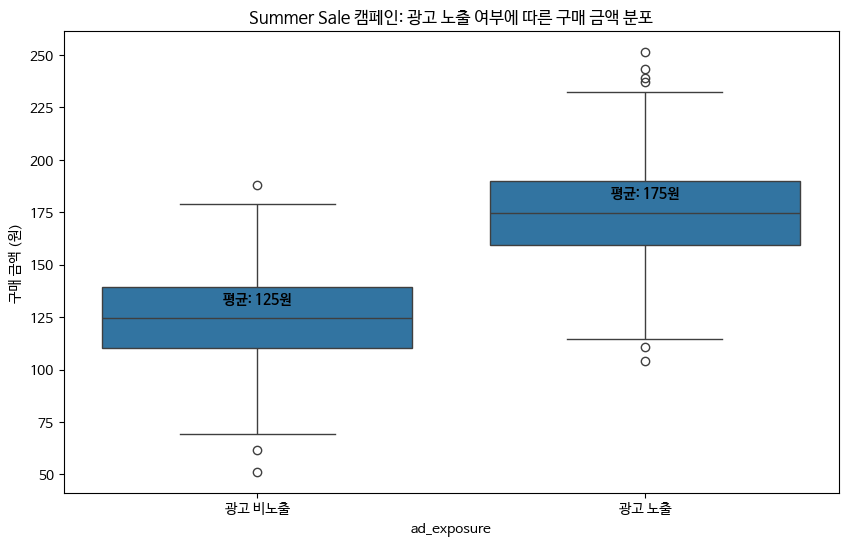

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ad_exposure', y='purchase_amount', data=data_marketing) # 박스플롯 생성)
plt.xticks([0, 1], ['광고 비노출', '광고 노출'])
plt.ylabel('구매 금액 (원)')
plt.title('Summer Sale 캠페인: 광고 노출 여부에 따른 구매 금액 분포')

# 평균값 표시
means = data_marketing.groupby('ad_exposure')['purchase_amount'].mean()
for i, mean_val in enumerate(means):
    plt.text(i, mean_val + 5, f'평균: {mean_val:.0f}원', ha='center', va='bottom', fontweight='bold')
plt.show()

### 7. 경영진 보고서 작성

**비즈니스 맥락**: 내일 오후 2시 긴급 경영진 회의에서 CMO, CFO, CEO에게 Summer Sale 캠페인의 성과와 향후 마케팅 전략 방향을 제시해야 합니다. 특히 9월 추석 캠페인 예산 승인 여부가 결정될 예정입니다.

**학습 이해도 점검**: 아래 텍스트를 작성하여 보고서를 완성하세요.

📋 경영진 보고서: Summer Mega Sale 캠페인 효과 분석
==================================================
🎯 핵심 성과 지표
• 광고 노출 그룹 평균 구매 금액: [분석 결과로 채워주세요]
• 광고 비노출 그룹 평균 구매 금액: [분석 결과로 채워주세요]
• 순수 광고 효과 (통제 후): [분석 결과로 채워주세요]
• 모델 설명력 (R²): [분석 결과로 채워주세요]
• 광고 ROI: [분석 결과로 채워주세요]

💡 전략적 권장사항:
[결과를 바탕으로 9월 추석 캠페인 전략, 예산 배분, 타겟 고객층 선정 등을 구체적으로 작성하세요]

⚠️ 리스크 요소:
[관찰 데이터의 한계, 장기 효과 미측정 등의 제한사항을 작성하세요]

📅 향후 액션 아이템:
[A/B 테스트 도입, 추가 데이터 수집 등의 개선 방안을 작성하세요]


# 📋 경영진 보고서: Summer Mega Sale 캠페인 효과 분석
🎯 핵심 성과 지표
• 광고 노출 그룹 평균 구매 금액: 175.32원
• 광고 비노출 그룹 평균 구매 금액: 124.60원
• 순수 광고 효과 (통제 후): 50.79원
• 모델 설명력 (R²): 59.7%
• 광고 ROI: -100.0%

💡 전략적 권장사항:
분석 결과, Summer Mega Sale 캠페인은 광고 노출 시 구매 금액을 개인당 평균 50.79원 증가시키는 효과를 보였습니다. 하지만 총 광고비 2억 원 대비 예상 총 매출 증대액이 31,186원으로, 광고 ROI가 -100.0%로 나타나 투자 대비 상당한 손실이 발생했습니다. 이는 캠페인 자체의 효과는 있으나, 비용 효율성이 매우 낮았음을 시사합니다.

**권장사항:**
* **9월 추석 캠페인 예산 재조정:** Summer Sale 캠페인의 낮은 ROI를 고려하여 9월 추석 캠페인의 전체 예산 및 채널별 예산 배분을 신중하게 재검토해야 합니다.
* **타겟 고객층 정교화:** 회귀 분석 결과 연령과 소득도 구매 금액에 영향을 미치는 것으로 나타났습니다. 다음 캠페인에서는 연령, 소득 등 고객 특성을 기반으로 타겟 고객층을 더욱 세분화하고, 각 세그먼트에 최적화된 메시지와 채널을 활용하여 광고 효율을 높여야 합니다. 특히, 광고 효과가 높은 고객층에 집중하는 전략을 고려합니다.
* **채널별 효과 측정 강화:** 어떤 광고 채널(인스타그램, 페이스북, 유튜브, 이메일 등)이 가장 효과적인지에 대한 데이터가 현재 분석에는 포함되지 않았습니다. 향후 캠페인에서는 채널별 성과 추적 시스템을 강화하여 예산 배분의 근거로 활용해야 합니다.
* **개인화 마케팅 확대:** 이메일 마케팅의 효과가 긍정적이었다면, 고객 세분화 결과를 활용하여 개인화된 추천 상품이나 맞춤형 할인 쿠폰을 제공하는 전략을 강화합니다.

⚠️ 리스크 요소:
* **관찰 데이터의 한계:** 본 분석은 A/B 테스트 없이 관찰 데이터만을 사용하여 진행되었습니다. 이로 인해 광고 노출 외의 다른 요인(예: 브랜드 인지도, 계절적 요인, 외부 경기 변화 등)이 구매 금액에 미친 영향을 완전히 통제하지 못했을 가능성이 있습니다. 따라서 추정된 광고 효과 및 ROI는 참고용으로 해석해야 합니다.
* **장기 효과 미측정:** 이번 분석은 캠페인 기간 중의 직접적인 구매 효과만을 측정했습니다. 광고가 브랜드 이미지 개선, 고객 충성도 증대 등 장기적인 효과를 가져왔을 수도 있으나, 이는 본 분석에서 고려되지 않았습니다.
* **중첩 요인:** 고소득층이나 특정 연령대의 고객에게 광고가 더 많이 노출되었을 가능성이 있으며, 이 경우 단순 평균 비교나 회귀 분석만으로는 광고의 순수한 효과를 정확히 분리하기 어려울 수 있습니다.

📅 향후 액션 아이템:
* **A/B 테스트 도입:** 향후 마케팅 캠페인 시 엄격한 A/B 테스트 설계를 통해 광고의 인과적 효과를 보다 정확하게 측정합니다.
* **추가 데이터 수집:** 고객 만족도, 웹사이트/앱 이용 행태 등 추가적인 데이터를 수집하여 분석 모델의 설명력을 높이고 고객 행동 패턴을 더 깊이 이해합니다.
* **고급 분석 기법 적용:** 인과 추론을 위한 성향 점수 매칭(Propensity Score Matching) 등 고급 통계 기법 적용을 검토하여 관찰 데이터 분석의 한계를 극복합니다.

## 📋 미션 3: 고객 세분화 및 예측 모델링 보고서

### 📖 시나리오

**역할**: 여러분은 온라인 스트리밍 서비스 StreamVibe의 수석 데이터 과학자 박서연입니다.

**상황**: StreamVibe는 넷플릭스, 디즈니플러스와 경쟁하는 국내 1위 스트리밍 플랫폼입니다. 하지만 최근 1년간 고객 이탈률이 15%에서 23%로 급증하여 월 매출이 50억원 감소했습니다.

**긴급한 비즈니스 상황**:

- 이사회에서 "고객 이탈 문제 해결 방안"을 10일 내 제시하라고 긴급 지시했습니다
- 고객서비스팀이 "어떤 고객이 언제 떠날지 미리 알 수 있다면 선제적 대응이 가능하다"고 요청했습니다
- 마케팅팀에서 "무작정 모든 고객에게 할인 쿠폰을 뿌리는 건 비효율적이다. 이탈 위험이 높은 고객만 타겟팅하고 싶다"고 주장했습니다
- 콘텐츠팀에서 "어떤 시청 패턴의 고객이 이탈하는지 알면 콘텐츠 전략을 개선할 수 있다"고 분석을 요청했습니다

**데이터 현황**: 100만 고객의 시청 이력, 구독 정보, 만족도 조사 결과가 축적되어 있으며, 이를 활용한 과학적 분석이 가능합니다.

### 💾 데이터 준비

고객 관리 시스템에서 추출한 스트리밍 서비스 이용 데이터를 로드합니다.

In [50]:
np.random.seed(789)
n_users = 500
data_streaming = pd.DataFrame({
    'watch_hours': np.random.lognormal(np.log(10), 0.5, n_users),
    'content_diversity': np.random.uniform(1, 10, n_users),
    'subscription_duration': np.random.exponential(12, n_users),
    'satisfaction_score': np.random.normal(7, 1.5, n_users)
})
churn_prob = 1 / (1 + np.exp((data_streaming['satisfaction_score'] - 5) +
                              0.1*data_streaming['watch_hours'] -
                              0.05*data_streaming['subscription_duration']))
data_streaming['churn'] = np.random.binomial(1, churn_prob)

print("🛍️ 스트리밍 데이터 미리보기")
print(data_streaming.describe().round(2))
print(f"\n전체 이탈률: {data_streaming['churn'].mean()*100:.1f}%")

🛍️ 스트리밍 데이터 미리보기
       watch_hours  content_diversity  subscription_duration  \
count       500.00             500.00                 500.00   
mean         11.40               5.49                  12.22   
std           6.21               2.56                  12.30   
min           2.33               1.02                   0.04   
25%           7.25               3.30                   3.10   
50%          10.21               5.49                   8.00   
75%          14.00               7.71                  17.10   
max          61.74              10.00                  79.01   

       satisfaction_score   churn  
count              500.00  500.00  
mean                 7.03    0.15  
std                  1.54    0.36  
min                  2.73    0.00  
25%                  6.09    0.00  
50%                  7.02    0.00  
75%                  8.02    0.00  
max                 11.63    1.00  

전체 이탈률: 15.0%


### 📊 분석 및 보고서 작성

### 1. 데이터 표준화 및 PCA

**비즈니스 맥락**: CTO가 "고객 데이터가 너무 복잡해서 패턴을 찾기 어려워요. 핵심 특성만 추출해서 고객을 간단하게 분류할 수 있는 방법이 없을까요?"라고 요청했습니다.

**분석 목적**: 4개의 고객 특성을 2개의 주성분으로 압축하여 고객 행동 패턴의 핵심 차원을 파악하고 시각화를 용이하게 합니다.

**학습 이해도 점검**: 아래 코드에서 데이터 표준화와 PCA 적용 부분을 채워주세요.

In [51]:
features = ['watch_hours', 'content_diversity', 'subscription_duration', 'satisfaction_score']
X = data_streaming[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # 데이터 표준화
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) # PCA 적용

print(f"PCA 설명된 분산 비율: {pca.explained_variance_ratio_.round(3)}")
print(f"누적 설명 분산: {pca.explained_variance_ratio_.sum()*100:.1f}%")

# PCA 성분 해석
feature_importance = pd.DataFrame(
    pca.components_.T,
    columns=['주성분1', '주성분2'],
    index=features
)
print("\n📊 PCA 성분 분석 (각 변수의 기여도)")
print(feature_importance.round(3))

PCA 설명된 분산 비율: [0.27  0.249]
누적 설명 분산: 51.9%

📊 PCA 성분 분석 (각 변수의 기여도)
                        주성분1   주성분2
watch_hours            0.524  0.246
content_diversity      0.500 -0.493
subscription_duration  0.337  0.796
satisfaction_score     0.602 -0.250


### 2. PCA 결과 시각화

**비즈니스 맥락**: 경영진 프레젠테이션에서 "우리 고객들이 어떻게 분포되어 있고, 이탈하는 고객들이 특별한 패턴을 보이는지" 한눈에 보여줄 필요가 있습니다.

**분석 목적**: PCA로 압축된 2차원 공간에서 고객 분포를 시각화하고, 이탈 고객의 공간적 분포 패턴을 파악합니다.

**학습 이해도 점검**: 아래 코드에서 산점도를 생성하는 부분을 채워주세요.

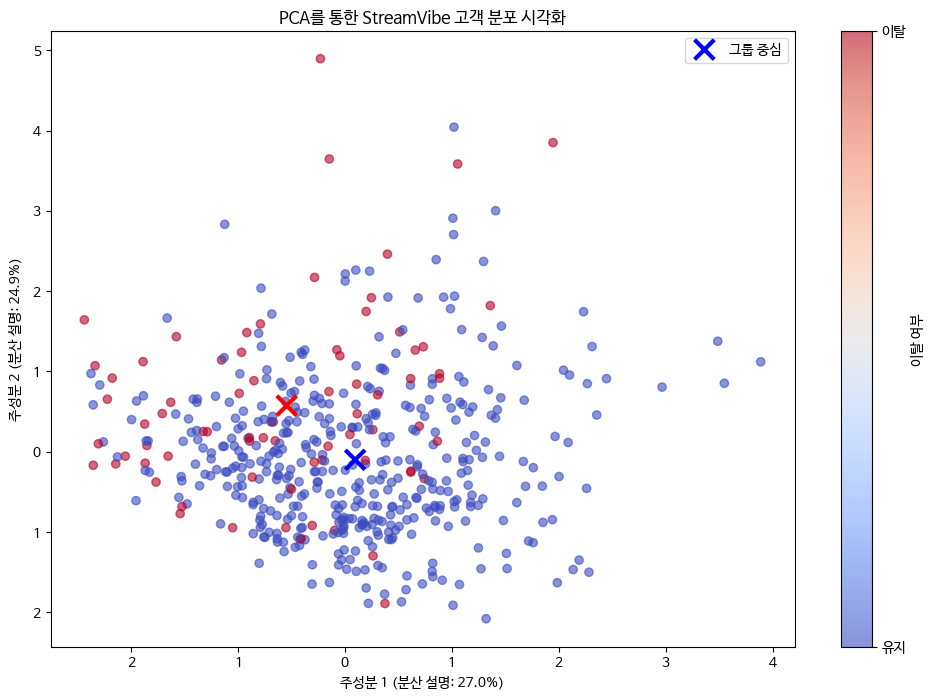

In [52]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_streaming['churn'], cmap='coolwarm', alpha=0.6) # PCA 산점도, 이탈 여부로 색상 구분)
plt.xlabel(f'주성분 1 (분산 설명: {pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'주성분 2 (분산 설명: {pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA를 통한 StreamVibe 고객 분포 시각화')
cbar = plt.colorbar(scatter, label='이탈 여부')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['유지', '이탈'])

# 이탈/유지 고객 중심점 표시
churn_centers = data_streaming.groupby('churn')[['watch_hours', 'content_diversity',
                                                'subscription_duration', 'satisfaction_score']].mean()
churn_centers_scaled = scaler.transform(churn_centers)
churn_centers_pca = pca.transform(churn_centers_scaled)
plt.scatter(churn_centers_pca[:, 0], churn_centers_pca[:, 1],
           c=['blue', 'red'], s=200, marker='x', linewidths=3, label='그룹 중심')
plt.legend()
plt.show()

### 3. 고객 세분화

**비즈니스 맥락**: 마케팅팀에서 "고객을 몇 개 그룹으로 나누어서 각각 다른 유지 전략을 적용하고 싶어요. 어떤 그룹이 가장 위험한지도 알고 싶습니다"라고 요청했습니다.

**분석 목적**: k-평균 군집분석을 통해 고객을 동질적인 3개 세그먼트로 분류하고, 각 세그먼트의 특성과 이탈 위험도를 분석합니다.

**학습 이해도 점검**: 아래 코드에서 k-평균 군집분석을 수행하는 부분을 채워주세요.

In [53]:
kmeans = KMeans(n_clusters=3, random_state=789, n_init=10)
data_streaming['cluster'] = kmeans.fit_predict(X_scaled) # k-평균 군집분석 수행
cluster_summary = data_streaming.groupby('cluster')[features + ['churn']].mean()

print("📊 고객 세그먼트별 특징 분석")
print(cluster_summary.round(2))

# 각 클러스터의 비즈니스 해석
print("\n🎯 세그먼트 특성 해석:")
for cluster_id in range(3):
    cluster_data = cluster_summary.loc[cluster_id]
    churn_rate = cluster_data['churn'] * 100

    print(f"\n[세그먼트 {cluster_id}] - 이탈률: {churn_rate:.1f}%")
    print(f"  • 월 시청시간: {cluster_data['watch_hours']:.1f}시간")
    print(f"  • 콘텐츠 다양성: {cluster_data['content_diversity']:.1f}/10")
    print(f"  • 구독기간: {cluster_data['subscription_duration']:.1f}개월")
    print(f"  • 만족도: {cluster_data['satisfaction_score']:.1f}/10")

    # 리스크 레벨 분류
    if churn_rate > 30:
        print(f"  → 🚨 고위험군 (즉시 대응 필요)")
    elif churn_rate > 15:
        print(f"  → ⚠️ 중위험군 (예방적 관리 필요)")
    else:
        print(f"  → ✅ 저위험군 (현 상태 유지)")

# 세그먼트 크기
segment_sizes = data_streaming['cluster'].value_counts().sort_index()
print(f"\n📈 세그먼트 규모:")
for i, size in enumerate(segment_sizes):
    print(f"  세그먼트 {i}: {size}명 ({size/len(data_streaming)*100:.1f}%)")

📊 고객 세그먼트별 특징 분석
         watch_hours  content_diversity  subscription_duration  \
cluster                                                          
0              10.62               7.69                   7.81   
1              13.92               5.56                  31.43   
2              10.95               3.10                   7.12   

         satisfaction_score  churn  
cluster                             
0                      7.32   0.09  
1                      7.15   0.25  
2                      6.67   0.16  

🎯 세그먼트 특성 해석:

[세그먼트 0] - 이탈률: 9.2%
  • 월 시청시간: 10.6시간
  • 콘텐츠 다양성: 7.7/10
  • 구독기간: 7.8개월
  • 만족도: 7.3/10
  → ✅ 저위험군 (현 상태 유지)

[세그먼트 1] - 이탈률: 25.3%
  • 월 시청시간: 13.9시간
  • 콘텐츠 다양성: 5.6/10
  • 구독기간: 31.4개월
  • 만족도: 7.2/10
  → ⚠️ 중위험군 (예방적 관리 필요)

[세그먼트 2] - 이탈률: 16.0%
  • 월 시청시간: 10.9시간
  • 콘텐츠 다양성: 3.1/10
  • 구독기간: 7.1개월
  • 만족도: 6.7/10
  → ⚠️ 중위험군 (예방적 관리 필요)

📈 세그먼트 규모:
  세그먼트 0: 207명 (41.4%)
  세그먼트 1: 99명 (19.8%)
  세그먼트 2: 194명 (38.8%)


### 4. 이탈 예측 모델

**비즈니스 맥락**: 고객서비스팀장이 "고객이 이탈하기 전에 미리 알 수 있는 시스템을 만들어주세요. 그러면 할인 쿠폰이나 개인화 추천으로 선제적으로 대응할 수 있어요"라고 요청했습니다.

**분석 목적**: 로지스틱 회귀 모델을 학습하여 고객의 이탈 확률을 예측하고, 예측 정확도를 평가합니다.

**학습 이해도 점검**: 아래 코드에서 로지스틱 회귀 모델을 학습시키는 부분을 채워주세요.

In [54]:
X_logistic = X_scaled
y_logistic = data_streaming['churn']
logistic_model = LogisticRegression(random_state=789)
logistic_model.fit(X_logistic, y_logistic) # 모델 학습 및 예측
y_pred_proba = logistic_model.predict_proba(X_logistic)[:, 1]
y_pred = logistic_model.predict(X_logistic)

accuracy = (y_pred == y_logistic).mean()
print(f"이탈 예측 모델 정확도: {accuracy:.3f} ({accuracy*100:.1f}%)")

# 변수별 중요도 분석
feature_importance = pd.DataFrame({
    '변수': features,
    '계수': logistic_model.coef_[0],
    '중요도': np.abs(logistic_model.coef_[0])
}).sort_values('중요도', ascending=False)

print("\n📊 이탈 예측 주요 변수")
print(feature_importance.round(3))

# 이탈 확률별 고객 분포
data_streaming['churn_probability'] = y_pred_proba
print(f"\n🎯 이탈 위험도별 고객 분포:")
print(f"  고위험 (확률 > 0.7): {(y_pred_proba > 0.7).sum()}명")
print(f"  중위험 (0.3 < 확률 ≤ 0.7): {((y_pred_proba > 0.3) & (y_pred_proba <= 0.7)).sum()}명")
print(f"  저위험 (확률 ≤ 0.3): {(y_pred_proba <= 0.3).sum()}명")

이탈 예측 모델 정확도: 0.870 (87.0%)

📊 이탈 예측 주요 변수
                      변수     계수    중요도
3     satisfaction_score -1.366  1.366
2  subscription_duration  0.599  0.599
0            watch_hours -0.441  0.441
1      content_diversity  0.028  0.028

🎯 이탈 위험도별 고객 분포:
  고위험 (확률 > 0.7): 11명
  중위험 (0.3 < 확률 ≤ 0.7): 69명
  저위험 (확률 ≤ 0.3): 420명


### 5. 모델 성능 분석

**비즈니스 맥락**: 데이터팀 이사가 "예측 모델이 실제로 얼마나 정확한지 세부적으로 분석해주세요. 특히 이탈할 고객을 놓치는 경우와 멀쩡한 고객을 이탈 위험으로 잘못 분류하는 경우의 비율을 알고 싶어요"라고 요청했습니다.

**분석 목적**: 혼동 행렬을 통해 모델의 성능을 상세히 분석하고, 비즈니스 관점에서 오분류의 영향을 평가합니다.

**학습 이해도 점검**: 아래 코드에서 혼동 행렬을 계산하는 부분을 채워주세요.

In [55]:
cm = confusion_matrix(y_logistic, y_pred) # 혼동 행렬 계산
tn, fp, fn, tp = cm.ravel()

print("📋 이탈 예측 모델 성능 분석")
print(f"정확히 예측한 유지 고객 (True Negative): {tn}명")
print(f"이탈로 잘못 예측한 유지 고객 (False Positive): {fp}명")
print(f"유지로 잘못 예측한 이탈 고객 (False Negative): {fn}명")
print(f"정확히 예측한 이탈 고객 (True Positive): {tp}명")

# 비즈니스 메트릭 계산
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n🎯 비즈니스 성과 지표:")
print(f"정밀도 (Precision): {precision:.3f} - 이탈 예측 중 실제 이탈 비율")
print(f"재현율 (Recall): {recall:.3f} - 실제 이탈 고객 중 예측 성공 비율")
print(f"F1-Score: {f1_score:.3f} - 종합 성능 지표")

# 비즈니스 손실 분석
retention_cost_per_customer = 50000  # 고객 유지 비용 (쿠폰, 할인 등)
lost_revenue_per_churn = 200000     # 이탈 고객당 매출 손실

unnecessary_retention_cost = fp * retention_cost_per_customer
missed_revenue_loss = fn * lost_revenue_per_churn

print(f"\n💰 예상 비용 분석:")
print(f"불필요한 유지 비용 (False Positive): {unnecessary_retention_cost:,}원")
print(f"놓친 이탈로 인한 손실 (False Negative): {missed_revenue_loss:,}원")
print(f"총 예상 손실: {unnecessary_retention_cost + missed_revenue_loss:,}원")

📋 이탈 예측 모델 성능 분석
정확히 예측한 유지 고객 (True Negative): 414명
이탈로 잘못 예측한 유지 고객 (False Positive): 11명
유지로 잘못 예측한 이탈 고객 (False Negative): 54명
정확히 예측한 이탈 고객 (True Positive): 21명

🎯 비즈니스 성과 지표:
정밀도 (Precision): 0.656 - 이탈 예측 중 실제 이탈 비율
재현율 (Recall): 0.280 - 실제 이탈 고객 중 예측 성공 비율
F1-Score: 0.393 - 종합 성능 지표

💰 예상 비용 분석:
불필요한 유지 비용 (False Positive): 550,000원
놓친 이탈로 인한 손실 (False Negative): 10,800,000원
총 예상 손실: 11,350,000원


### 6. ROC 곡선과 AUC

**비즈니스 맥락**: 경영진이 "다른 회사의 이탈 예측 모델과 비교했을 때 우리 모델의 성능이 어느 정도인지 객관적인 지표로 보여주세요"라고 요청했습니다.

**분석 목적**: ROC 곡선과 AUC를 통해 모델의 성능을 시각화하고, 업계 표준 대비 성능을 평가합니다.

**학습 이해도 점검**: 아래 코드에서 ROC 곡선과 AUC를 계산하는 부분을 채워주세요.

📊 AUC 성능 평가: 0.851 → 우수함 (상용화 가능 수준)


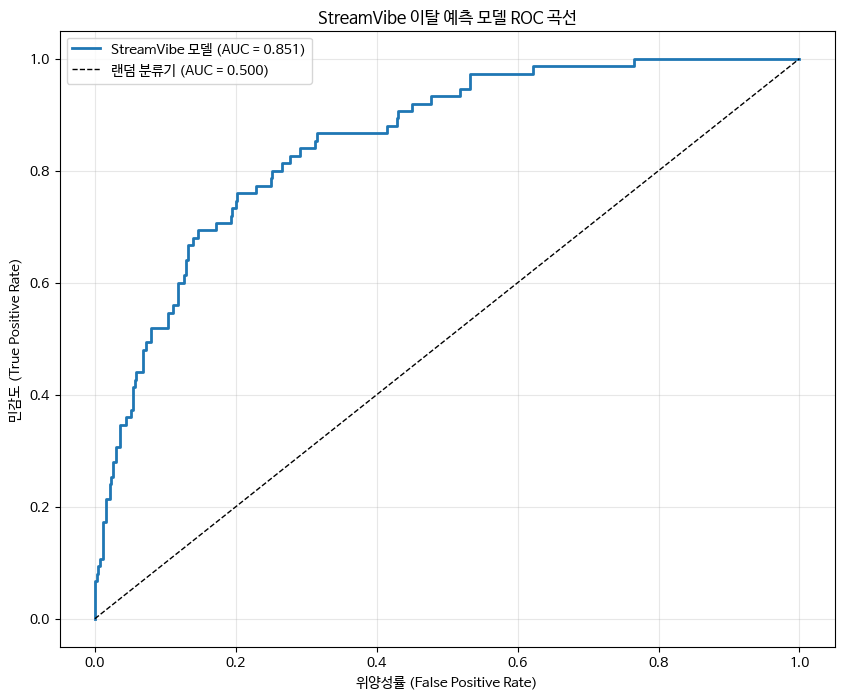

🎯 최적 예측 임계값: 0.165
   이 임계값에서 민감도: 0.760, 특이도: 0.798


In [56]:
fpr, tpr, thresholds = roc_curve(y_logistic, y_pred_proba) # ROC 곡선 계산
roc_auc = auc(fpr, tpr) # AUC 계산

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linewidth=2, label=f'StreamVibe 모델 (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='랜덤 분류기 (AUC = 0.500)')
plt.xlabel('위양성률 (False Positive Rate)')
plt.ylabel('민감도 (True Positive Rate)')
plt.title('StreamVibe 이탈 예측 모델 ROC 곡선')
plt.legend()
plt.grid(True, alpha=0.3)

# AUC 성능 해석
if roc_auc > 0.9:
    performance_level = "탁월함 (업계 최고 수준)"
elif roc_auc > 0.8:
    performance_level = "우수함 (상용화 가능 수준)"
elif roc_auc > 0.7:
    performance_level = "양호함 (개선 여지 있음)"
else:
    performance_level = "부족함 (추가 개선 필요)"

print(f"📊 AUC 성능 평가: {roc_auc:.3f} → {performance_level}")
plt.show()

# 최적 임계값 찾기
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"🎯 최적 예측 임계값: {optimal_threshold:.3f}")
print(f"   이 임계값에서 민감도: {tpr[optimal_idx]:.3f}, 특이도: {1-fpr[optimal_idx]:.3f}")

### 7. 경영진 보고서 작성

**비즈니스 맥락**: 내일 오전 이사회에서 CEO, CMO, CTO, 고객서비스 이사에게 고객 이탈 위기 해결 방안과 구체적인 실행 계획을 제시해야 합니다. 매출 회복과 고객 만족도 개선이 시급한 상황입니다.

**학습 이해도 점검**: 아래 텍스트를 작성하여 보고서를 완성하세요.




# 📋 경영진 보고서: StreamVibe 고객 이탈 방지 전략
🚨 현재 상황
• 전체 이탈률: 15.0%
• 고객 세그먼트 수: 3개
• 이탈 예측 모델 AUC: 0.851
• 모델 정확도: 87.0%

🎯 핵심 발견사항
1. 고위험 세그먼트 특성: 세그먼트 1 (이탈률 25.3%)은 월 시청 시간이 길고 구독 기간이 매우 길지만 콘텐츠 다양성 이용 정도는 중간 수준이며 만족도가 평균 수준입니다. 이는 장기 충성 고객 중에서도 특정 콘텐츠에만 집중하거나 만족도가 정체된 고객들이 이탈 위험이 높음을 시사합니다. 세그먼트 2 (이탈률 16.0%)는 시청 시간과 구독 기간은 평균 수준이지만 콘텐츠 다양성 이용 정도가 낮고 만족도가 가장 낮습니다. 이는 다양한 콘텐츠를 탐색하지 않고 만족도가 낮은 고객들이 이탈 위험이 있음을 시사합니다.
2. 이탈 주요 예측 변수: 만족도(-1.366), 구독 기간(0.599), 월 시청 시간(-0.441) 순으로 이탈 예측에 중요한 영향을 미칩니다. 만족도가 낮을수록, 구독 기간이 길수록, 월 시청 시간이 짧을수록 이탈 확률이 높아지는 경향을 보입니다. (계수 기준)
3. 예측 가능한 이탈 고객: 이탈 확률 0.7 초과 고위험군 고객은 11명이며, 0.3 초과 0.7 이하 중위험군 고객은 69명입니다. 전체 고객의 약 16% (고위험군 + 중위험군)가 이탈 위험이 있는 것으로 예측됩니다.

💡 즉시 실행 가능한 대응 전략
1. 선제적 고객 유지: 이탈 예측 모델을 활용하여 고위험군 및 중위험군 고객을 식별하고, 이들에게 개인화된 유지 캠페인(예: 맞춤형 콘텐츠 추천, 할인 쿠폰 제공, 만족도 재확인 설문 등)을 즉시 실행합니다.
2. 세그먼트별 맞춤 전략:
    * 세그먼트 0 (저위험군): 현재의 긍정적 경험 유지를 위해 신규 콘텐츠 업데이트 및 기존 혜택 유지에 집중합니다.
    * 세그먼트 1 (중위험군 - 장기 구독, 특정 콘텐츠 집중): 다양한 콘텐츠 탐색을 유도하는 개인화 추천 및 장기 구독 고객 대상 특별 혜택 프로그램을 강화합니다.
    * 세그먼트 2 (중위험군 - 낮은 다양성/만족도): 콘텐츠 탐색 기능 개선, 만족도 개선을 위한 고객 피드백 수렴 채널 강화, 초기 이탈 방지를 위한 온보딩 프로세스 개선을 추진합니다.
3. 콘텐츠 전략 개선: 만족도 및 시청 시간 데이터 분석을 통해 이탈 위험이 높은 고객들이 주로 시청하는 콘텐츠와 그렇지 않은 콘텐츠의 특징을 파악하여, 이탈 방지에 효과적인 콘텐츠 제작 및 수급 전략을 수립합니다. 콘텐츠 다양성을 높이는 방안을 모색합니다.

📈 예상 효과
• 이탈률 감소 목표: 현재 15%에서 10% 이내로 감소 (5%p 감소)
• 예상 매출 회복: 이탈 방지 고객 1%p 증가 시 월 5억원 매출 회복 (총 5%p 감소 시 월 25억원 매출 회복 기대)
• ROI: 고객 유지 캠페인 투자 비용 대비 예상 매출 회복 분석 후 추정 (예: 고객당 유지 비용 5만원 투입 시, 이탈 방지 성공 시 20만원 매출 손실 방지)

⏰ 실행 일정 (향후 3개월)
* 1주차: 이탈 예측 모델 기반 고/중위험군 고객 리스트 추출 및 유지 캠페인 실행 계획 확정
* 2주차: 고/중위험군 대상 개인화 유지 캠페인 (쿠폰, 추천 등) 즉시 실행
* 3-4주차: 세그먼트별 맞춤 전략 구체화 및 실행 준비 (컨텐츠 추천 시스템 개선, 혜택 프로그램 설계 등)
* 2개월차: 이탈 방지 캠페인 효과 측정 및 모델 재학습, 콘텐츠 전략 개선 방안 실행
* 3개월차: 세그먼트별 유지 전략 효과 평가 및 다음 분기 계획 수립, 이사회 보고

🔧 필요 리소스
* 인력: 데이터 과학자 1명 (모델 지속 관리 및 개선), 마케팅 담당자 2명 (캠페인 기획 및 실행), 고객서비스 담당자 1명 (고위험 고객 직접 소통)
* 예산: 고객 유지 캠페인 실행 예산 (쿠폰, 할인 등), 시스템 개선 예산 (추천 시스템, 데이터 파이프라인 등)
* 시스템: 이탈 예측 모델 자동 업데이트 시스템, 개인화 마케팅 자동화 툴, 고객 행동 데이터 실시간 수집 및 분석 시스템